## <h1><center>Course: Introduction to Machine Learning</center></h1>
## <h1><center>Assigment 4</center></h1>
### <h1><center>Important NOTE: In order to get full grades, for every question, you need to provide the details of your work on how to get to a solution or the end of the proof</center></h1>
#### <h1><center>Instructor: Tan Bui-Thanh</center></h1>
#### <h1><center>TA: Hai Nguyen</center></h1>
##### <h1><center>Due day: 11:59 pm, 21 October, Friday, 2022 </center></h1>
#### All solutions must be in one pdf file except codes.

## **Question 1** (+30) (Probalistic linear regression )
Generating 6 data samples for the problem by this polynomial functions (use the below given code for create $x^i$)
$$ f(x) = .5 - {x} - .5 {x}^2 - 2 {x}^3 + 5 {x}^4$$
Then adding noise:
$y^i = f(x^i) + \epsilon$, where $\epsilon \sim \mathcal{N}(0, \delta^2)$, and noise level $\delta = 0.2$

The approximation model is 2nd order.

In assignment 3, question 3. We have computed the posterior distribution by using $\theta^*$ (the MAP point) to achieve the mean, and keep the variance the same as the noise level $\delta^2$. 

1. Instead of that, using Bayesian Predictions, finding the mean and variance of 
$$ P(y | x, \mathcal{D}) = \int_\theta P(y \mid x, \theta) P(\theta \mid \mathcal{D}) d\theta. $$

2. Plotting the the uncertainty band with the range of x [0,1] (Plotting training data samples will help answer the part Q1.3).
3. Discuss the result by comparing with the results that you achieved in assignment 3 (just using the MAP point).


<b> Answer 1 </b>

The first step is to assume $p(\theta)$ as a Gaussian prior:
$$ p(\theta) = \mathcal{N}(0, \tau^2I)$$
where,  $I$ = $3$ x $3$ identity matrix, since the approximation model is second order.

The prior over the noise is:
$$ \epsilon = \mathcal{N}(0, \delta^2)$$
Here, $\delta = 0.2$


We are taking the data as $\mathcal{D} = (y, X)$

\begin{align*}
    p(\theta|\mathcal{D}) & \propto p(\mathcal{D}|\theta)p(\theta) \\ 
    &= p(y|X, \theta)p(\theta) \\
    & = \mathcal{N}(y|X, \theta, \sigma^2I) \mathcal{N}(0, \tau^2I) \\
    & \propto \exp\left(- \frac{1}{2\sigma^2}(y - X\theta)^T(y - X\theta) + \frac{1}{\tau^2} \theta^T\theta\right) \\
    & = \exp\left(- \frac{1}{2}\left[\frac{1}{\sigma^2}(\theta^TX^TX\theta - 2 \theta^TX^Ty + y^Ty) + \frac{1}{\tau^2} \theta^T\theta\right]\right)
\end{align*}

Dropping terms which do not involve $\theta$

\begin{align*}
    p(\theta|\mathcal{D}) & \propto p(\mathcal{D}|\theta)p(\theta) \\ 
    & \propto \exp\left(- \frac{1}{2}\left[\theta^T(\frac{1}{\sigma^2}X^TX + \frac{1}{\tau^2})\theta - 2\frac{1}{\sigma^2}y^TX\theta)\right]\right) \\
    & \propto \exp\left(- \frac{1}{2}\left[ \theta^TA\theta - 2b^T\theta\right]\right),
\end{align*}
where, $A = \frac{1}{\sigma^2}X^TX + \frac{1}{\tau^2}I$
and, $b = \frac{1}{\sigma^2}X^Ty $



Completing the square and dropping terms independent of $\theta$, 

$$\propto \exp\left(- \frac{1}{2}\left[(\theta - A^{-1}b)^TA(\theta - A^{-1}b)\right]\right)$$

This is reminiscent of a normal distribution of the form: 

$$ p(\theta|\mathcal{D}) = \mathcal{N}(\theta | A^{-1}b, A^{-1})$$

Thus, the posterior is: 
$$ p(\theta|\mathcal{D}) = \mathcal{N}(\theta | \frac{1}{\sigma^2}X^TA^{-1}y, A^{-1})$$

where $A = \frac{1}{\sigma^2}X^TX + \frac{1}{\tau^2}I$

To compute the posterior predictive distribution, the following intergral must be evaluated, which is the integration of the posterior over all the possible values of $\theta$ for the model. 

$$ P(y | x, \mathcal{D}) = \int_\theta P(y \mid x, \theta) P(\theta \mid \mathcal{D}) d\theta. $$

Since we are finding the convolution of two Gaussians, the result will also be a Gaussian whose mean and variance we can calculate analytically without performing the integration.

Recalling that the regression model is defined as
$$ y = \theta^\top X + \epsilon$$
where $X$ is the feature vector
$$\begin{bmatrix} 1 & x^1 & x^2\end{bmatrix}$$

Using linear transformation rule on Gaussian distribution and changing variables, 

$$y_* = \theta^\top X_*, \;\;\; \theta \sim \mathcal{N}(\mu, \Sigma), \;\;\; p(y_*| X_*, \theta) = \mathcal{N}(y|\mu^TX_*, X_*^T\Sigma X_*)$$

The noise can be added using summation rule for Gaussian distributions. 

The posterior predictive distribution then becomes: 

$$p(y_*|x_*,\mathcal{D}) \sim \mathcal{N}(\mu_*, \Sigma_*)$$

$$\mu_* = \mu^\top X_*$$

$$\Sigma_* = X^\top _*\Sigma X_* + \sigma^2I$$


Using the formulas we calculated earlier, the complete formula for posterior predictive distributon is: 

$$p(y_*|x_*,\mathcal{D}) \sim \mathcal{N}( \frac{1}{\sigma^2}X_*^\top A^{-1}X^\top y, \;\;X_*^\top A^{-1} X_* + \sigma^2)$$

where $A = \frac{1}{\sigma^2}X^\top X + \frac{1}{\tau^2}I$


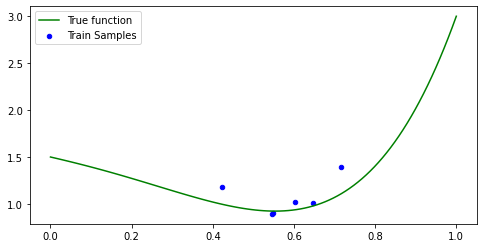

In [6]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 4]
np.random.seed(0)

## please keep the below codes for generating x, DO NOT CHANGE!
# ==========================================================================================
n_train_samples = 6
X_train = np.sort(np.random.rand(n_train_samples)) 

order_true = 5
true_coefficient = np.array([.5, -1, -.5, -2, 5])

def true_fn(X):
    f = np.ones((X.shape))
    for i in range(order_true):
        f += true_coefficient[i] * X**i
    return f

sigma = .2
Y_train = true_fn(X_train) + (np.random.randn(n_train_samples)) * sigma

X_test = np.linspace(0., 1., 100)
plt.plot(X_test,true_fn(X_test),'g',label = 'True function')
plt.scatter(X_train,Y_train, edgecolor='b', s=20, facecolor = 'b', label="Train Samples")
plt.legend()

# [CONTINUE YOUR WORK FROM HERE!]

Writing the implementation for the above derived model, and plotting mean and variance:

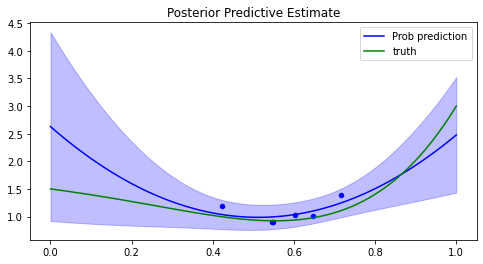

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

# Generating feature matrix
def make_Xf(x):
    trans = PolynomialFeatures(degree=2)
    Xf = trans.fit_transform(x.reshape(-1, 1))
    return Xf

# Taking sigma to be equal to the noise level of the data
# and taking Tau to be a reasonable value

tau = 100

# Function to fit the training data
def fit(x,y):
  Phi = make_Xf(x)
  r,c = Phi.shape
  A_inv = np.linalg.pinv(np.eye(c)/tau + Phi.T@Phi/sigma**2)
  Mean_coeff = A_inv@Phi.T@y/sigma**2
  
  return A_inv, Mean_coeff

# Function to predict data
def predict(x, Mean_coeff, A_inv):
  Phi = make_Xf(x)
  mean = Phi@Mean_coeff
  var = sigma**2 + Phi@A_inv@Phi.T
  
  # print((Phi@A_inv@Phi.T).shape)
  
  sig = np.sqrt(np.diag(var))
  
  return mean , sig
  

A_inv, Mean_coeff = fit(X_train,Y_train)
mean1,lims1 = predict(X_test, Mean_coeff, A_inv)

# Generating Plots
plt.fill_between(X_test, mean1 - lims1, mean1 + lims1, color = 'blue', alpha = 0.25)
plt.plot(X_test, mean1, color ='blue', label = 'Prob prediction')
plt.plot(X_test, true_fn(X_test) , color = 'green', label = 'truth')
plt.scatter(X_train,Y_train, edgecolor='b', s=20, facecolor = 'b')
plt.title("Posterior Predictive Estimate")
plt.legend()

Next step is to compare with MAP estimate. The code has been copied from Assigment 3, with the degree of the polynomial model changed to 2. 

Optimization terminated successfully.
         Current function value: 1.347616
         Iterations: 11
         Function evaluations: 52
         Gradient evaluations: 13


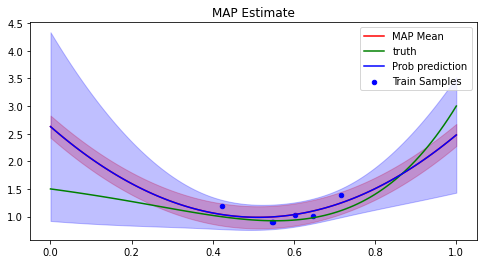

In [8]:
# Define polynomial model of degree 2, which returns the predicted y value
# This function has 3 theta parameters to optimize
degree = 2

def polynomial_function(x, theta):
    yPred = theta[0]
    for i in range(degree):
      yPred = yPred + theta[i+1]*x**(i+1)
    return yPred

## Defining objective function for MAP
# Define Log Likelihood function
def calcLogLikelihood(pred, true):
    error = true-pred
    # Using simplified form of Log Likelihood, which is equivalent to MSE
    # Dropping the constant term as it is not required for minimization
    f = -1*(np.dot(error.T,error))/(2*sigma**2)  
    return f

# Define MAP function
def MAPFunction(theta):
    x = X_train
    y = Y_train
    yGuess = polynomial_function(x, theta)
    # Adding Gaussian prior term to MLE objective function
    f = calcLogLikelihood(yGuess, y) - 0.5/tau*np.linalg.norm(theta)**2
    return (-1*f)

ntheta = degree + 1
theta = np.zeros(ntheta)

from scipy.optimize import minimize
res = minimize(MAPFunction, theta, method='BFGS', options={'disp': True})

theta_opt_MAP = res.x

# variance = np.var(Y_train - polynomial_function(X_train, theta_opt_MAP))
variance = sigma**2
sigma_MAP = np.sqrt(variance)

X_test = np.linspace(0., 1., 100)
Y_mean = polynomial_function(X_test, theta_opt_MAP)
plt.plot(X_test,Y_mean,color = 'red',label = 'MAP Mean')
plt.plot(X_test, true_fn(X_test) , color = 'green', label = 'truth')
plt.fill_between(X_test, Y_mean - sigma_MAP, Y_mean + sigma_MAP, color = 'red', alpha = 0.25)

plt.scatter(X_train,Y_train, edgecolor='b', s=20, facecolor = 'b', label="Train Samples")

plt.fill_between(X_test, mean1 - lims1, mean1 + lims1, color = 'blue', alpha = 0.25)
plt.plot(X_test, mean1, color ='blue', label = 'Prob prediction')
plt.title("MAP Estimate")
plt.legend()


## **Question 2** (+20 +10 bonous)

1. In lecture 7, we can maximize the likelihood 
$$\max_{\mu_k, \Sigma_k} \sum_{i : y^{(i)} = k} \log P(x^{(i)} | y^{(i)} ; \mu_k, \Sigma_k)
= \max_{\mu_k, \Sigma_k} \sum_{i : y^{(i)} = k} \log \mathcal{N}(x^{(i)} | \mu_k, \Sigma_k)$$
over the Gaussian parameters. Prove that the empirical means and covariances of each class are
\begin{align*}
\mu_k & = \frac{\sum_{i: y^{(i)} = k} x^{(i)}}{n_k} \\
\Sigma_k & = \frac{\sum_{i: y^{(i)} = k} (x^{(i)} - \mu_k)(x^{(i)} - \mu_k)^\top}{n_k}.
\end{align*}

2. (bonous 10+) In lecture 7, using $P_\theta(y = i) = \phi_i$ requires the constraint $\sum_{k = 1}^K\phi_k = 1$. Using Lagrangian multipliers method shows that $\theta_k = \frac{n_k}{n}$. (Please see Spring_21__Lecture_Notes_Math_II.pdf/section 3.6.2 in the suplementary material.)


<b>Answer 2</b>
1. 

The objective is to find the empirical means and covariances of each class for a Gaussian Discriminant Model.

The Likelihood Function to maximize is given by:

$$\max_{\mu_k, \Sigma_k} \sum_{i : y^{(i)} = k} \log P(x^{(i)} | y^{(i)} ; \mu_k, \Sigma_k)
= \max_{\mu_k, \Sigma_k} \sum_{i : y^{(i)} = k} \log \mathcal{N}(x^{(i)} | \mu_k, \Sigma_k)$$
over the Gaussian parameters. Prove that the empirical means and covariances of each class are
\begin{align*}
\mu_k & = \frac{\sum_{i: y^{(i)} = k} x^{(i)}}{n_k} \\
\Sigma_k & = \frac{\sum_{i: y^{(i)} = k} (x^{(i)} - \mu_k)(x^{(i)} - \mu_k)^\top}{n_k}
\end{align*}


First, we expand the Log Likelihood function:
$$ \max_{\mu_k, \Sigma_k} \sum_{i : y^{(i)} = k} \log \mathcal{N}(x^{(i)} | \mu_k, \Sigma_k) $$

\begin{align*}
\max_{\mu_k, \Sigma_k} \sum_{i : y^{(i)} = k} log \frac{1}{(2\pi)^{d/2}|\Sigma_k|^2} exp\left(-\frac{1}{2}(x - u_k)^\top \Sigma^{-1}(x - u_k)\right) \\
= \frac{n}{2} log2\pi - \frac{1}{2}log|\Sigma_k| - \frac{1}{2}(x - u_k)^\top\Sigma^{-1}(x - u_k)
\end{align*}

- For $u_k$,

$$\frac{\partial}{\partial u_k}\mathcal{L}(\phi, u_k, \Sigma_k) =  \sum_{i = 1}^{m}\left[ - \frac{1}{2}log|\Sigma_k| - \frac{1}{2}\frac{\partial}{\partial u_k}(x - u_k)^\top\Sigma^{-1}(x - u_k)\right] = 0$$

Using $\frac{\partial\alpha^\top A\alpha}{\partial \alpha} = 2\alpha^\top A$, 

Taking $\alpha = (x^{(i)} - u_k) $
$$\frac{\partial \alpha}{\partial u_k} = \left\{
\begin{array}{ll}
      1 & i|y^{(i)} = k \\
      0 & else \\
\end{array} 
\right. = i\{y^{(i)}=k\}$$

$$\frac{\partial}{\partial u_k}\mathcal{L} = - \frac{1}{2}.2\sum_{i = 1}^{m}(x - u_k)^\top\Sigma^{-1}\frac{\partial \alpha}{\partial u_k} = 0$$
$$ \implies \sum_{i = 1}^{m}x^{(i)}\frac{\partial \alpha}{\partial u_k} - \sum_{i = 1}^{m}u_k\frac{\partial \alpha}{\partial u_k} = 0 $$
$$\implies u_k = \frac{\sum_{i = 1}^{m}x^{(i)}\frac{\partial \alpha}{\partial u_k}}{\sum_{i = 1}^{m}\frac{\partial \alpha}{\partial u_k}}$$

Plugging in the values for $\frac{\partial \alpha}{\partial u_k}$
$$ \mu_k = \frac{\sum_{i: y^{(i)} = k} x^{(i)}}{n_k} $$

- For $\Sigma_k$,

$$\frac{\partial}{\partial \Sigma_k}\mathcal{L}(\phi, u_k, \Sigma_k) = \sum_{i = 1}^{m}\left[-\frac{1}{2} \frac{\partial log(|\Sigma|)}{\partial \Sigma_k} -\frac{1}{2}\frac{\partial}{\partial \Sigma_k}(x - u_k)^\top\Sigma_k^{-1}(x - u_k)\right]= 0$$

$$ \implies\sum_{i = 1}^{m}\left[ \frac{1}{2}\Sigma_k^{-\top}- \frac{1}{2}\Sigma_k^{-\top}(x - u_k)^\top(x - u_k)\Sigma_k^{-T}\right] = 0$$

$$\implies\sum_{i = 1}^{m}\left[ 1\{y^{(i)} = k\} - \Sigma_k^{-\top}(x - u_k)^\top (x - u_k)\right] = 0$$
$$\implies n_k - \sum_{i = 1}^{m}\Sigma_k^{-\top}(x - u_k)^\top (x - u_k)=0$$
$$\implies \Sigma_k = \frac{\sum_{i: y^{(i)} = k} (x^{(i)} - \mu_k)(x^{(i)} - \mu_k)^\top}{n_k} $$

Hence proved. 



2. 

In order to fit probabilistic models, we use maximum joint likelihood that we have learned:
$$ \max_\theta \mathbb{E}_{x, y \sim \mathbb{P}_\text{data}} \log P_\theta(x, y). $$
This seeks to find a model that assigns high probability to the training data.

Using Gaussian Discriminant model, the model parameters $\theta$ are the union of the parameters of each sub-model:

$$\theta = (\mu_1, \Sigma_1, \phi_1, \ldots, \mu_K, \Sigma_K, \phi_K).$$

The components of the joint likelihood $P_\theta(x,y=i)$ are

$$ P_\theta(y = i) = \phi_i$$

subject to the constraint 

 $$\sum_{k = 1}^K\phi_k = 1$$

\
Using the notation that $P_{\beta}(\cdot) = P(\cdot| \beta)$, where $\beta$ is a set of parameters such as $(\mu_j, \Sigma_j)$ or $\vec \phi = \{\phi_1,...,\phi_K\}$ or the whole set of training parameters $\theta$.

For a given dataset $\mathcal{D} = \{(x^{(i)}, y^{(i)})\mid i=1,2,\ldots,n\}$, we want to optimize the log-likelihood $\ell(\theta)$:
\begin{align*}
\ell(\theta) = \log  \Pi_{i=1}^nP_\theta(x^{(i)}, y^{(i)})& = \sum_{i=1}^n \log P_\theta(x^{(i)}, y^{(i)}) = \sum_{i=1}^n \log P_\theta(x^{(i)} | y^{(i)}) + \sum_{i=1}^n \log P_\theta(y^{(i)}) \\
& = \sum_{j=1}^K  \underbrace{\sum_{i : y^{(i)} = j} \log P(x^{(i)} | y^{(i)} ; \mu_j, \Sigma_j)}_\text{all the terms that involve $\mu_k, \Sigma_k$} + \underbrace{\sum_{i=1}^n \log P(y^{(i)}|\vec\phi)}_\text{all the terms that involve $\vec\phi$}.
\end{align*}
\
Optimizing for $\vec \phi = (\phi_1, \phi_2, \ldots, \phi_K)$ only involves the second term:
$$ \max_{\vec \phi} \sum_{i=1}^n \log P(y^{(i)}|\vec\phi) $$

Again subject to the constraint that  $$\sum_{k = 1}^K\phi_k = 1$$

First, expanding this expression: 
\begin{align*}
J(\vec\phi) & = \sum_{i=1}^n  \log P_\theta(y^{(i)} | \vec \phi) \\
& = \sum_{i=1}^n \log \phi_{y^{(i)}} \\ 
& = \sum_{k=1}^K \sum_{i : y^{(i)} = k} \log \phi_k \\
& = \sum_{k=1}^K log \phi_k^{[y^{(i) = k}]}
\end{align*}

Using the Lagrange method of multiplies for constrained optimization, the Lagrange function is given by: 
$$ L = \sum_{i=1}^K \log \phi^{[y^{(i) = k}]} + \lambda \left(\sum_{k = 1}^K\phi_k - 1 \right)$$

where $\lambda$ is another parameter.

\begin{align*}
    \frac{\partial L}{\partial \phi_k} & = \frac{n_k}{\phi_k} - \lambda = 0\\
    \frac{\partial L}{\partial \lambda} & = \sum_{k = 1}^K\phi_k - 1 = 0
\end{align*}





Taking the summation of the first result, 
$$∑n_k = N = \lambda∑\phi_i = \lambda$$

Therefore, for a particular class k,

$$ \frac{n_k}{\phi_k} - N = 0 \implies \phi_k = \frac{n_k}{N}$$


Hence proved. 

## Question 3: (+30) (Generative VS Discriminative Models)

We are going to use the Iris flower dataset. We will use three features sepal length (cm), sepal width (cm), petal length (cm) to classify types of flowers in generative model.
1. Compute the emprical means and covariance matrices for each type of flowers.
2. Generating new flowers, denoted as set $S$, from the learned propability and plotting these generated flowers in 3D. Observe and discuss your results.
3. We assume that set $S$ is test data. Classify the test data $S$ using the generative model that you have found in question 1. Discuss you results.
4. We assume that set $S$ is test data. Using logistic regression to training the model, then verify the learn model with test data $S$. Compare and discuss your results with question 3.3

<b>Answer</b>

Loading the dataset:

In [9]:
import numpy as np 
import pandas as pd 
import warnings 
warnings.filterwarnings('ignore') 
from sklearn import datasets 
 
# Load the Iris dataset 
iris = datasets.load_iris(as_frame=True) 
 
# print part of the dataset 
iris_X, iris_y = iris.data, iris.target 
pd.concat([iris_X, iris_y], axis=1).head() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Plotting the data: 

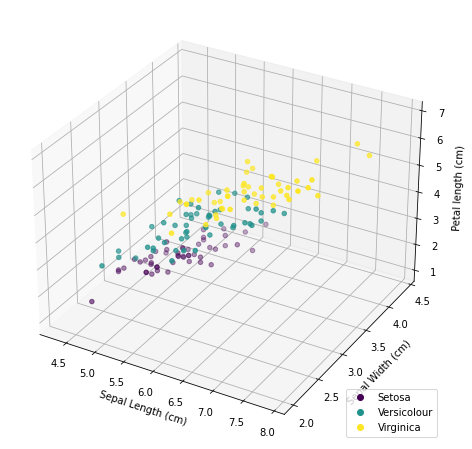

In [10]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

# create 3d version of dataset
X = iris_X.to_numpy()[:,:3]

# Plot also the training points

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
sc = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=iris_y)
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal length (cm)')
ax.legend(handles=sc.legend_elements()[0], labels=['Setosa', 'Versicolour', 'Virginica'], loc='lower right')


1. Calculating the mean and covariance matrices for the dataset: 

In [11]:
d = 3 # number of features
K = 3 # number of clases 
n = X.shape[0] # size of the dataset 
 
# these are the shapes of the parameters 
mus = np.zeros([K,d]) 
Sigmas = np.zeros([K,d,d]) 
phis = np.zeros([K]) 
 
# we now compute the parameters from the solution of the above optimization 
for k in range(3): 
    X_k = X[iris_y == k] 
    mus[k] = np.mean(X_k, axis=0) 
    Sigmas[k] = np.cov(X_k.T) 
    phis[k] = X_k.shape[0] / float(n) 
 
# print out the means 
print("The Means are given by: ")
print(mus) 
print("The covariance matrices are given by: ")
print(Sigmas)

The Means are given by: 
[[5.006 3.428 1.462]
 [5.936 2.77  4.26 ]
 [6.588 2.974 5.552]]
The covariance matrices are given by: 
[[[0.12424898 0.09921633 0.0163551 ]
  [0.09921633 0.1436898  0.01169796]
  [0.0163551  0.01169796 0.03015918]]

 [[0.26643265 0.08518367 0.18289796]
  [0.08518367 0.09846939 0.08265306]
  [0.18289796 0.08265306 0.22081633]]

 [[0.40434286 0.09376327 0.3032898 ]
  [0.09376327 0.10400408 0.07137959]
  [0.3032898  0.07137959 0.30458776]]]


2. Generating new flowers $S$ from the learned propability:

In [12]:
s = 100 # number of samples

# STEP 1: we sample flower class based on phi
ys = np.random.multinomial(n=1, pvals=phis, size=(s,)).argmax(axis=1)
xs = np.zeros([s,d])

# STEP 2: sample flowers from each class
for k in range(K):
    nk = (ys==k).sum()
    xs[ys==k,:] = np.random.multivariate_normal(mus[k], Sigmas[k], size=(nk,))

Plotting the newly generated dataset $S$:

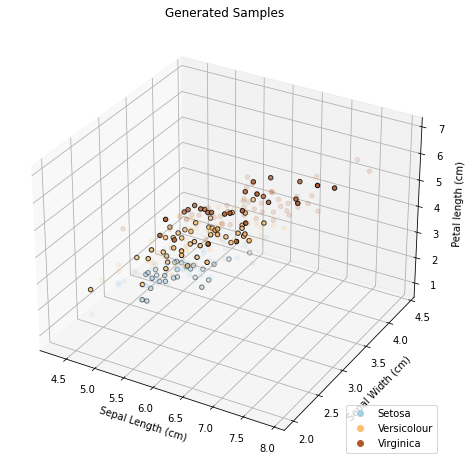

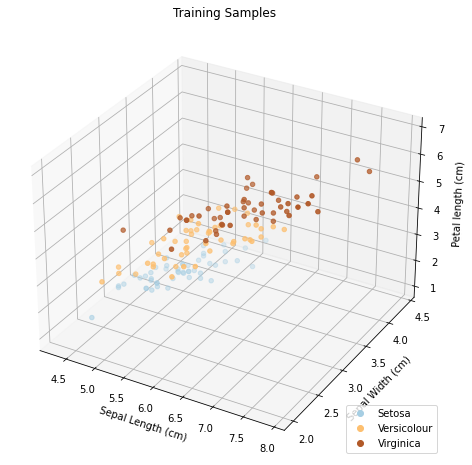

In [13]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
sc1 = ax.scatter(xs[:,0], xs[:,1], xs[:, 2], c=ys, edgecolors='k', cmap=plt.cm.Paired)
sc2 = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=iris_y, cmap=plt.cm.Paired, alpha=0.15)
ax.set_title('Generated Samples')
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal length (cm)')
ax.legend(handles=sc1.legend_elements()[0], labels=['Setosa', 'Versicolour', 'Virginica'], loc='lower right')
plt.show()

# Training Samples
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
sc3 = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=iris_y, cmap=plt.cm.Paired)
ax.set_title('Training Samples')
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal length (cm)')
ax.legend(handles=sc3.legend_elements()[0], labels=['Setosa', 'Versicolour', 'Virginica'], loc='lower right')
plt.show()

The generated data looks very similar to our existing data. We can observe that the more outlying points are not that much in number, and the generated points are more clustered around the calculated means. 

3. Using the Generative model we developed in Question 1:

In [14]:
from numpy.core.fromnumeric import mean
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix


# Taking sigma to be equal to the noise level of the data
# and taking Tau to be a reasonable value
sigma = 0.2
tau2 = 10

# Function to fit the training data
def fit(x,y):
  Phi = x
  r,c = Phi.shape
  A_inv = np.linalg.pinv(np.eye(c)/tau2 + Phi.T@Phi/sigma**2)
  Mean_coeff = A_inv@Phi.T@y/sigma**2
  return A_inv, Mean_coeff

# Function to predict data
def predict(x, Mean_coeff, A_inv, return_predictive = True):
  Phi = x
  mean = Phi@Mean_coeff
  var = sigma**2 + Phi@A_inv@Phi.T
  if return_predictive:
    sig = np.sqrt(np.diag(var))
    return mean , sig
  else:
    return mean

A_inv, Mean_coeff = fit(X, iris_y)
mean = predict(xs, Mean_coeff, A_inv, return_predictive = False)
mean_train = predict(X, Mean_coeff, A_inv, return_predictive = False)

ypred = mean.round()
acc = np.count_nonzero(ypred==ys)/np.size(ys)

print("Accuracy over test set S: " + str(acc))
print("Confusion Matrix: \n", confusion_matrix(ys, ypred))


Accuracy over test set S: 0.96
Confusion Matrix: 
 [[27  0  0]
 [ 0 44  2]
 [ 0  2 25]]


The generative model achieves a 95% accuracy over the test set $S$. This tells us that our model is a good approximation of the Iris flower dataset. The model has a few misclassified datapoints between the Versicolour and Virginica flower types, which can be attributed to the close proximity of the two class Gaussians. 



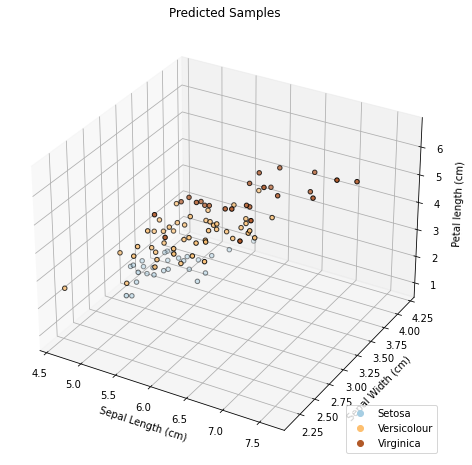

Accuracy over test set:0.96
Confusion Matrix: 
 [[27  0  0]
 [ 0 45  1]
 [ 0  3 24]]


In [15]:
# Discriminant Model
from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression(C=1e5, multi_class='multinomial')

logreg.fit(X, iris_y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
sc = ax.scatter(xs[:,0], xs[:,1], xs[:, 2], c=logreg.predict(xs), edgecolors='k', cmap=plt.cm.Paired)
ax.set_title('Predicted Samples')
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal length (cm)')
ax.legend(handles=sc.legend_elements()[0], labels=['Setosa', 'Versicolour', 'Virginica'], loc='lower right')
plt.show()

acc = np.count_nonzero(logreg.predict(xs)==ys)/np.size(ys)
print("Accuracy over test set:" + str(acc))
print("Confusion Matrix: \n", confusion_matrix(ys, logreg.predict(xs)))

The Discriminant model achieves a 96% accuracy over the test set $S$. This tells us that our model, like the generative model, is also a good approximation of the Iris flower dataset. The model has a few misclassified datapoints between the Versicolour and Virginica flower types, since there may not be a clear linear boundary between the two classes. 




## Question 4: (+20) (Bernoulli Naive Bayes Model)

1. From the lecture 8, we have the formula for the optimal value of $\psi_{jk}$
\begin{align*}
\psi_{jk} = \frac{n_{jk}}{n_k}.
\end{align*}
Derive this formula.
2. In lecture 8, we have classify the the document by bag of word method. We now make a simple comparison between BoW method and logistic regression. The training data: removing 2 class of type 2 and 3 from the data (the code is 4-class data). By that, our data becomes a binary classification problem. Performing BoW method and logistic regression method for the obtained 2-class data. Discussion the results.

<b> Answer </b>

1. For a Bernoulli naive Bayes classifier, we let $X=\{0, 1\}$

Then, we let  $p(X|Y)$  be modeled as Bernoulli distribution:

$$p(X|Y)=\theta ^X(1−θ)^{1−X}$$

For each class and each feature, 
$$p(Xj|Y=y_k)=\psi^{X_j}_{kj}(1−\psi_{kj})^{1−X_j}$$

Let the training data be: $D=\{X_1,X_2,X_3, ... , X_N\} $

Assuming each observation is independent of the other, we get:

$p(D|\theta )=\theta ^{X_1}(1−\theta)^{1−X_1}\theta^{X_2}(1−\theta )^{1−X_2}...(1−θ)^{1−X_N}$

Gathering the terms, 
$$p(D|θ)=θ^n(1−θ)^{N−n}$$
where $n$ is the number of times $X_j=1$ and N is the number of training examples.

To maximize $p(D|θ)$ w.r.t. $\theta$

\begin{align*}
    & \frac{∂}{∂θ}p(D|θ)=0\\
    & \implies \frac{∂}{∂θ}(θ^n)(1−θ)^{N−n}+θ^m\frac{∂}{∂θ}[(1−θ)^{N−n}]=0\\
    & \implies nθ^{n−1}(1−θ)^{N−n}−θ^n(N−n)(1−θ)^{N−n−1}=0\\
    & \implies n(1−θ)−θ(N−n)=0\\
    & \implies n−nθ−Nθ−nθ=0\\
    & \implies θ=\frac{n}{N}\\
\end{align*}



But since we are doing this for a particualr class, we add the subscripts and change the notation.
$$ \psi_{kj}=\frac{n_{kj}}{N_{kj}}$$

Hence proved.

2. Loading dataset with only two classes and converting the X data into a feature vector using Bag of Words.

In [16]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

categories = ['alt.atheism', 'sci.med']

# load the dataset
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

# vectorize the training set for BoW
count_vect = CountVectorizer(binary=True, max_features=1000)
y_train = twenty_train.target
X_train = count_vect.fit_transform(twenty_train.data).toarray()
X_train.shape

(1074, 1000)

Logistic regression model for BoW features:

In [17]:
from sklearn.linear_model import LogisticRegression 
 
# Create an instance of Softmax and fit the data. 
logreg = LogisticRegression(C=1e5, multi_class='multinomial', verbose=True) 
logreg.fit(X_train, twenty_train.target) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


LogisticRegression(C=100000.0, multi_class='multinomial', verbose=True)

Sanity check to see if model is performing correctly: 

In [18]:
docs_new = ['God is not love', 'Tuberculosis is a disease'] 
 
X_new = count_vect.transform(docs_new) 
predicted = logreg.predict(X_new) 
 
for doc, category in zip(docs_new, predicted): 
    print('%r => %s' % (doc, twenty_train.target_names[category])) 

'God is not love' => alt.atheism
'Tuberculosis is a disease' => sci.med


Loading test data and calculating accuracy:

In [19]:
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

# vectorize the Test set for BoW
count_vect = CountVectorizer(binary=True, max_features=1000)
y_test = twenty_test.target
X_test = count_vect.fit_transform(twenty_test.data).toarray()
X_test.shape

# Accuracy over test set:
Y_pred = logreg.predict(X_test)
# Accuracy over training set:
Y_pred_train = logreg.predict(X_train)


print("Logistic Regression for BoW text classification: ")
print("Accuracy over test set: ", str((Y_pred==y_test).mean()*100))
print("Accuracy over training set: ", str((Y_pred_train==y_train).mean()*100))


Logistic Regression for BoW text classification: 
Accuracy over test set:  46.71328671328671
Accuracy over training set:  100.0


Looking at the training accuracy it appears that the model is overfitting over the training set. It has only 47% accuracy over testing data which implies that the model is not generalized and not an accurate representation of the text data.

Naive Bayes Model for BoW:

In [20]:
n = X_train.shape[0] # size of the dataset 
d = X_train.shape[1] # number of features in our dataset 
K = 2 # number of clases 
 
# these are the shapes of the parameters 
psis = np.zeros([K,d]) 
phis = np.zeros([K]) 
 
# we now compute the parameters 
for k in range(K): 
    X_k = X_train[y_train == k] 
    psis[k] = np.mean(X_k, axis=0) 
    phis[k] = X_k.shape[0] / float(n) 
 
# print out the class proportions 
print(phis) 

[0.44692737 0.55307263]


In [21]:
def nb_predictions(x, psis, phis): 
    """This returns class assignments and scores under the NB model. 
     
    We compute \arg\max_y p(y|x) as \arg\max_y p(x|y)p(y) 
    """ 
    # adjust shapes 
    n, d = x.shape 
    x = np.reshape(x, (1, n, d)) 
    psis = np.reshape(psis, (K, 1, d)) 
     
    # clip probabilities to avoid log(0) 
    psis = psis.clip(1e-14, 1-1e-14) 
     
    # compute log-probabilities 
    logpy = np.log(phis).reshape([K,1]) 
    logpxy = x * np.log(psis) + (1-x) * np.log(1-psis) 
    logpyx = logpxy.sum(axis=2) + logpy 
 
    return logpyx.argmax(axis=0).flatten(), logpyx.reshape([K,n]) 
 
# Accuracy over test set:
Y_pred, logpyx = nb_predictions(X_test, psis, phis) 
# Accuracy over training set:
Y_pred_train, logpyx = nb_predictions(X_train, psis, phis) 

print("Naive Bayes Model for BoW text classification: ")
print("Accuracy over test set: ", str((Y_pred==y_test).mean()*100))
print("Accuracy over training set: ", str((Y_pred_train==y_train).mean()*100))

Naive Bayes Model for BoW text classification: 
Accuracy over test set:  61.25874125874125
Accuracy over training set:  97.95158286778398


The Naive Bayes Model achieves an accuracy of 61.26% over the test set and 97.95% over the training set. Thus, it appears to generalize better than the logistic regression model, although there is still a significant gap in the accuracy over the test set and training set. 